<a href="https://colab.research.google.com/github/hansonc2/birdwatch/blob/master/birdwatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#A program that classifies images of birds
##########################################
#                                        #
#               @Cole_Hanson             #
#                                        #
##########################################
'''
 ^ ^
(O,O)
(   )
-"-"---dwb---------------------------------
'''

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


In [ ]:
#Mount Drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
!ls "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
'Colab Notebooks'   data  'Getting started.pdf'   tf_logs


In [ ]:
#Setup data to be read
DATA_DIR = "/content/drive/My Drive/data"
TRAIN_DIR = "/content/drive/My Drive/data/train"
VALIDATION_DIR = "/content/drive/My Drive/data/validation"
LOG_DIR = "/content/drive/My Drive/tf_logs"

CATEGORIES = ["american_goldfinch", "american_robin", "black-capped_chickadee", "cardinal", "cedar_waxwing","common_grackle", "downy_woodpecker", "house_finch", "house_wren", "mourning_dove", "read-headed_woodpecker", "ruby-throated_hummingbird", "white-breasted_nuthatch", "white-throated_sparrow"]

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_training_data():
    '''
    create training data set
    '''
    batch_size = 32
    epochs = 7
    IMG_HEIGHT = 128
    IMG_WIDTH = 128
    train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
  
    train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                  directory=DATA_DIR,
                                                  shuffle=True,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  class_mode='categorical')
    
    return train_data_gen
    

In [ ]:
def create_validation_data():
    '''
    create validation data set
    '''
    batch_size = 32
    epochs = 7
    IMG_HEIGHT = 128
    IMG_WIDTH = 128
    validation_image_generator = ImageDataGenerator(rescale=1./255, 
                                                  rotation_range = 40, 
                                                  width_shift_range = 0.2, 
                                                  height_shift_range = 0.2,
                                                  shear_range = 0.2,
                                                  zoom_range = 0.2, 
                                                  horizontal_flip = True)

    validation_data_gen = validation_image_generator.flow_from_directory(batch_size = batch_size,
                                                  directory=VALIDATION_DIR,
                                                  shuffle=True,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  class_mode='categorical')
    
    return validation_data_gen
    

In [ ]:
def plotImages(images_arr):
    '''
      plot images in a given array of images
    '''
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Found 736 images belonging to 14 classes.


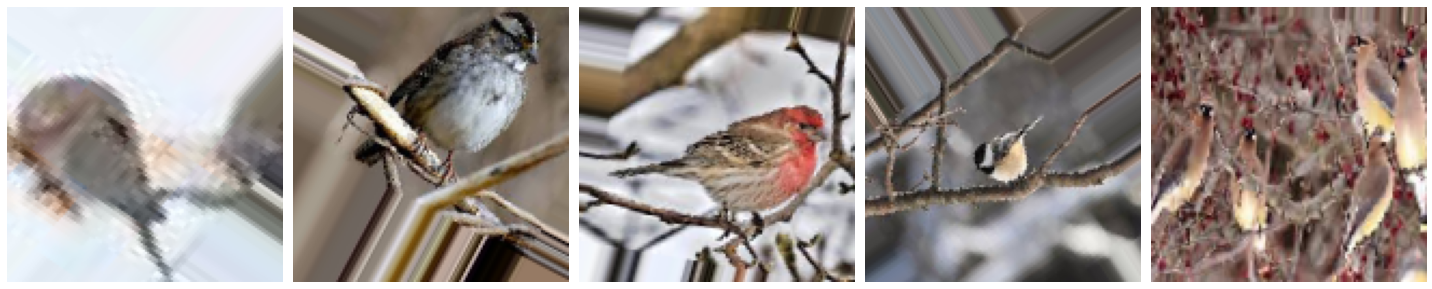

In [ ]:
#test validation data
val = create_validation_data()
sample_validation_images, _ = next(val)
validation_n = len(val)
#visualize
plotImages(sample_validation_images[:5])


Found 1882 images belonging to 14 classes.


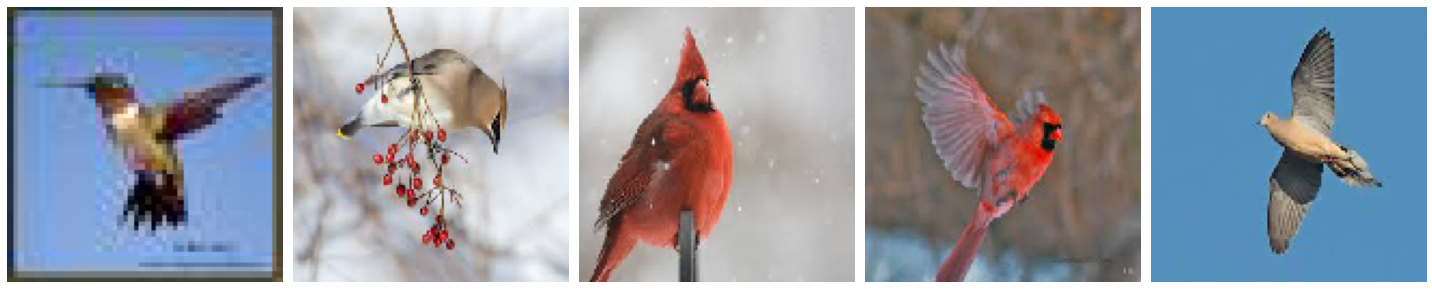

In [ ]:
#test training
training_data = create_training_data()
n = len(training_data)
sample_training_images, _ = next(training_data)
validation_n = len(val)
plotImages(sample_training_images[:5])

In [ ]:
#create CNN model
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(16, (3, 3), activation = tf.nn.relu, input_shape = (128, 128, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Dropout(.2),
tf.keras.layers.Conv2D(32, (3, 3), activation = tf.nn.relu),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Dropout(.2),
tf.keras.layers.Conv2D(64, (3, 3), activation = tf.nn.relu),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Dropout(.2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(14, activation=tf.nn.sigmoid)
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

In [ ]:
#compile
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

history = model.fit(
training_data,
batch_size = 32,
steps_per_epoch= len(training_data) // 10,
epochs= 12,
validation_data= val,
validation_steps= len(val) // 10)

Epoch 1/12
5/5 [==============================] - 41s 8s/step - loss: 2.7162 - accuracy: 0.0584 - val_loss: 2.6501 - val_accuracy: 0.0156
Epoch 2/12
5/5 [==============================] - 49s 10s/step - loss: 2.6325 - accuracy: 0.1000 - val_loss: 2.6423 - val_accuracy: 0.0625
Epoch 3/12
5/5 [==============================] - 36s 7s/step - loss: 2.6275 - accuracy: 0.1187 - val_loss: 2.6374 - val_accuracy: 0.0625
Epoch 4/12
5/5 [==============================] - 30s 6s/step - loss: 2.6386 - accuracy: 0.0688 - val_loss: 2.6365 - val_accuracy: 0.0781
Epoch 5/12
5/5 [==============================] - 38s 8s/step - loss: 2.6378 - accuracy: 0.1000 - val_loss: 2.6379 - val_accuracy: 0.1406
Epoch 6/12
5/5 [==============================] - 24s 5s/step - loss: 2.6268 - accuracy: 0.1250 - val_loss: 2.6348 - val_accuracy: 0.0938
Epoch 7/12
5/5 [==============================] - 42s 8s/step - loss: 2.6191 - accuracy: 0.1187 - val_loss: 2.6241 - val_accuracy: 0.0469
Epoch 8/12
5/5 [=================

In [ ]:
#prediction with new images
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  img = image.load_img(("/content/drive/My Drive/" + fn), target_size = (128,128))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print(max(classes[0]))


Saving american_robin60.jpeg to american_robin60 (5).jpeg
[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00 9.9996895e-01
 0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.7681042e-08
 0.0000000e+00 1.1217244e-32 0.0000000e+00 2.7898061e-08]
1.0
